In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from scripts.plotting import get_grid_search_data, set_axes_labels, set_axes_ticks, log_spaced_levels
plt.style.use('plot.mplstyle')
%config InlineBackend.figure_format = 'retina'

atomistic minimum: 0.50, 6.75
cg minimum: 0.20, 9.00
A_cg minimum: 0.80, 13.50


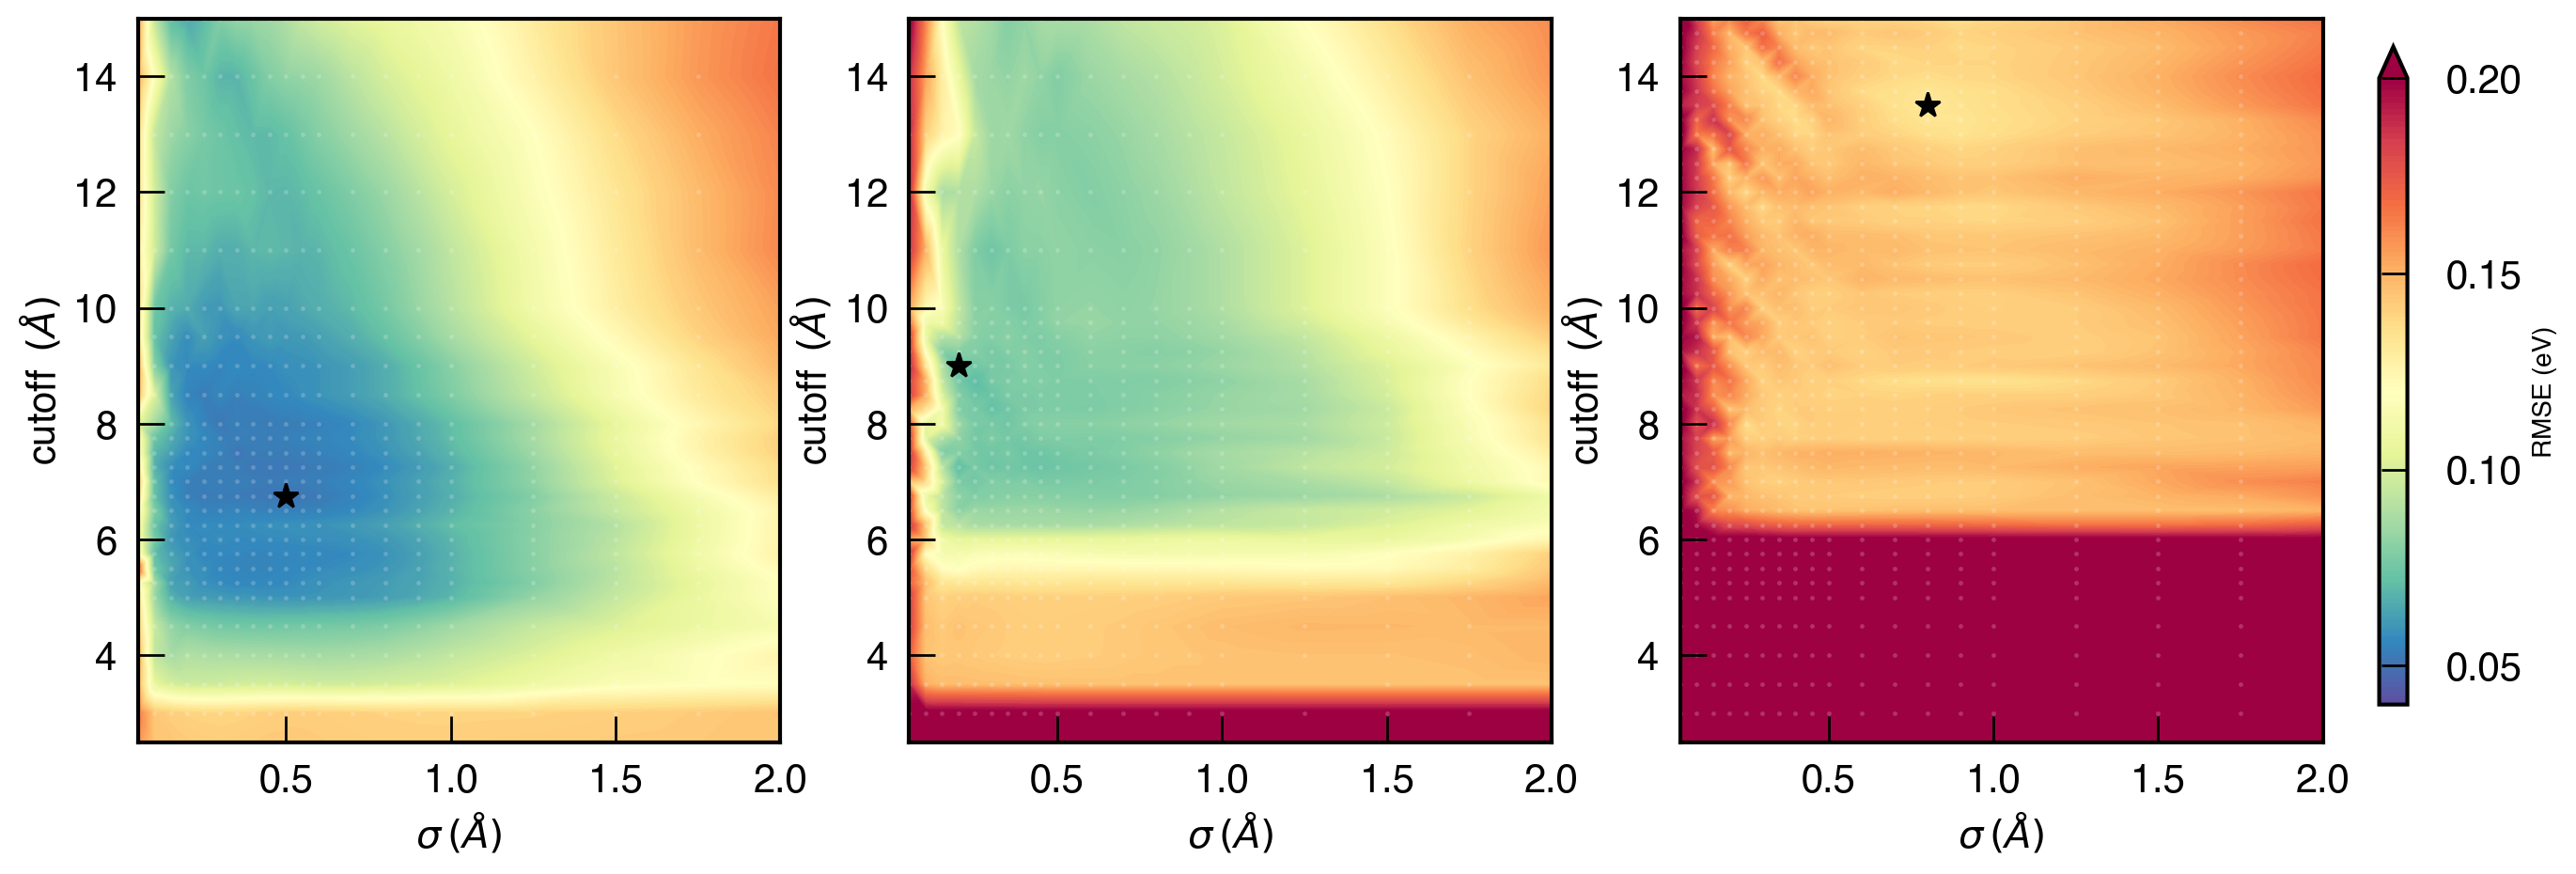

In [6]:
struct_types = ["atomistic","cg","A_cg"]

size = 5
fig, axs = plt.subplots(ncols=3, figsize=(3*size,size))

cbar_levels = log_spaced_levels(0.04, 0.20,200)
# cbar_ticks = [0.04, 0.06,0.08, 0.1, 0.12,0.14, 0.16,0.18, 0.20]
cbar_ticks = [0.05, 0.1, 0.15, 0.20]
# cbar_ticks = [0.10, 0.20, 0.30, 0.40, 0.50]

for s, ax in zip(struct_types, axs):
    # plot the grid search data
    x,y,z,x_min,y_min = get_grid_search_data(s,linker_type='H_new')
    a = ax.tricontourf(x,y,z,levels=cbar_levels,extend='max',cmap='Spectral_r')
    
    
    # set the axes
    set_axes_labels(ax, x_label='$\sigma \,(\AA)$', y_label='cutoff $\,(\AA)$')
    set_axes_ticks(ax,minor_ticks=False)
    
    # label the minimum
    ax.plot(x_min, y_min, '*',color='black',linewidth=0,markersize=10)
    ax.scatter(x,y,c='white',s=3,marker='o',linewidths=0,alpha=0.2)
    print(f'{s} minimum: {x_min:.2f}, {y_min:.2f}')

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(a, cax=cbar_ax, ticks=cbar_ticks,spacing='proportional',label='RMSE (eV)')
plt.savefig(f'../figures/new_figures/combined_grid_search.png',bbox_inches='tight',dpi=1500)